First video

In [51]:
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [3]:
a = tf.constant(np.array([1., 2., 3.]))
b = tf.constant(np.array([4., 5., 6.]))
c = tf.tensordot(a, b, 1)

In [12]:
output = c.numpy()
print(output)

32.0


Eager execution is where tensorflow does not need a "session" to execute

Lab

In [13]:
a = tf.constant([2], name = 'constant_a')
b = tf.constant([3], name = 'constant_b')

In [18]:
print(a)
tf.print(a.numpy()[0])

tf.Tensor([2], shape=(1,), dtype=int32)
2


In [19]:
@tf.function
def add(a,b):
    c = tf.add(a, b)
    #c = a + b is also a way to define the sum of the terms
    print(c)
    return c

result = add(a,b)
tf.print(result[0])

Tensor("Add:0", shape=(1,), dtype=int32)
5


In [20]:
Scalar = tf.constant(2)
Vector = tf.constant([5,6,2])
Matrix = tf.constant([[1,2,3],[2,3,4],[3,4,5]])
Tensor = tf.constant( [ [[1,2,3],[2,3,4],[3,4,5]] , [[4,5,6],[5,6,7],[6,7,8]] , [[7,8,9],[8,9,10],[9,10,11]] ] )

print ("Scalar (1 entry):\n %s \n" % Scalar)

print ("Vector (3 entries) :\n %s \n" % Vector)

print ("Matrix (3x3 entries):\n %s \n" % Matrix)

print ("Tensor (3x3x3 entries) :\n %s \n" % Tensor)

Scalar (1 entry):
 tf.Tensor(2, shape=(), dtype=int32) 

Vector (3 entries) :
 tf.Tensor([5 6 2], shape=(3,), dtype=int32) 

Matrix (3x3 entries):
 tf.Tensor(
[[1 2 3]
 [2 3 4]
 [3 4 5]], shape=(3, 3), dtype=int32) 

Tensor (3x3x3 entries) :
 tf.Tensor(
[[[ 1  2  3]
  [ 2  3  4]
  [ 3  4  5]]

 [[ 4  5  6]
  [ 5  6  7]
  [ 6  7  8]]

 [[ 7  8  9]
  [ 8  9 10]
  [ 9 10 11]]], shape=(3, 3, 3), dtype=int32) 



In [21]:
Matrix_one = tf.constant([[1,2,3],[2,3,4],[3,4,5]])
Matrix_two = tf.constant([[2,2,2],[2,2,2],[2,2,2]])

@tf.function
def add():
    add_1_operation = tf.add(Matrix_one, Matrix_two)
    return add_1_operation



print ("Defined using tensorflow function :")
add_1_operation = add()
print(add_1_operation)
print ("Defined using normal expressions :")
add_2_operation = Matrix_one + Matrix_two
print(add_2_operation)

Defined using tensorflow function :
tf.Tensor(
[[3 4 5]
 [4 5 6]
 [5 6 7]], shape=(3, 3), dtype=int32)
Defined using normal expressions :
tf.Tensor(
[[3 4 5]
 [4 5 6]
 [5 6 7]], shape=(3, 3), dtype=int32)


In [22]:

Matrix_one = tf.constant([[2,3],[3,4]])
Matrix_two = tf.constant([[2,3],[3,4]])

@tf.function
def mathmul():
  return tf.matmul(Matrix_one, Matrix_two)


mul_operation = mathmul()

print ("Defined using tensorflow function :")
print(mul_operation)



Defined using tensorflow function :
tf.Tensor(
[[13 18]
 [18 25]], shape=(2, 2), dtype=int32)


Variables are used to share and persist stats as the program runs

In [24]:
v = tf.Variable(0)
@tf.function
def increment_by_one(v):
        v = tf.add(v,1)
        return v
for i in range(3):
    v = increment_by_one(v)
    print(v)

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)


Operations

In [25]:
a = tf.constant([5])
b = tf.constant([2])
c = tf.add(a,b)
d = tf.subtract(a,b)


print ('c =: %s' % c)
    
print ('d =: %s' % d)

c =: tf.Tensor([7], shape=(1,), dtype=int32)
d =: tf.Tensor([3], shape=(1,), dtype=int32)


Linear Regression

In [35]:
x = np.arange(0, 10, 0.1)
y = 2.*x +3 + np.random.uniform(0, 2, x.size)

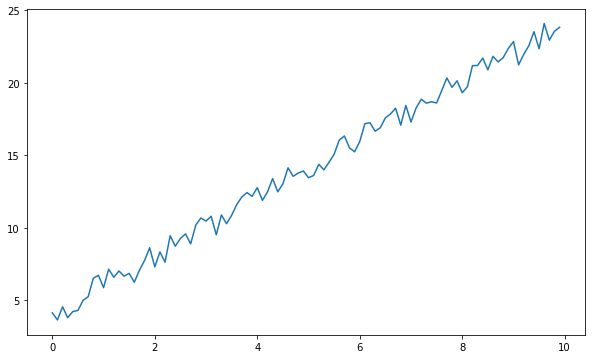

In [36]:
plt.plot(x, y)

In [44]:
Slope = tf.Variable(5.0)
Intercept = tf.Variable(5.2)


def h(x):
   y = Slope*x + Intercept
   return y

def loss(y,train_y) :
    return tf.reduce_mean(tf.square(y - train_y))

In [45]:
learning_rate = 0.01
train_data = []
loss_values =[]
# steps of looping through all your data to update the parameters
training_epochs = 2000

# train model
for epoch in range(training_epochs):
    with tf.GradientTape() as tape:
        y_predicted = h(x)
        loss_value = loss(y,y_predicted)
        loss_values.append(loss_value)

        # get gradients
        gradients = tape.gradient(loss_value, [Intercept, Slope])
        
        # compute and adjust weights
        Intercept.assign_sub(gradients[0]*learning_rate)
        Slope.assign_sub(gradients[1]*learning_rate)
        if epoch % 5 == 0:
            train_data.append([Slope.numpy(), Intercept.numpy()])

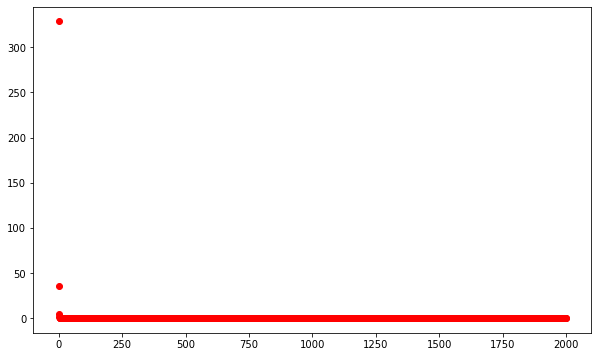

In [46]:
plt.plot(loss_values, 'ro')

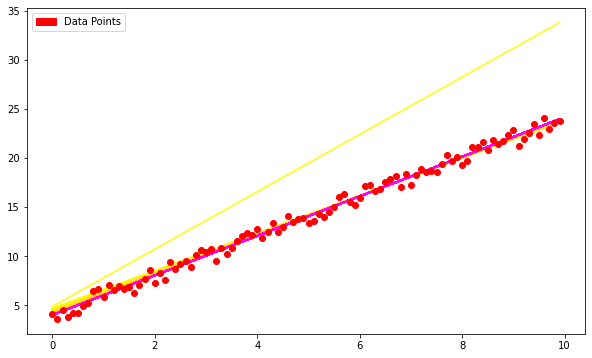

In [47]:
cr, cg, cb = (1.0, 1.0, 0.0)
for f in train_data:
    cb += 1.0 / len(train_data)
    cg -= 1.0 / len(train_data)
    if cb > 1.0: cb = 1.0
    if cg < 0.0: cg = 0.0
    [a, b] = f
    f_y = np.vectorize(lambda x: a*x + b)(x)
    line = plt.plot(x, f_y)
    plt.setp(line, color=(cr,cg,cb))

plt.plot(x, y, 'ro')
green_line = mpatches.Patch(color='red', label='Data Points')

plt.legend(handles=[green_line])

plt.show()

Logistic Regression

In [99]:
iris = load_iris()

In [100]:
iris_X, iris_y = iris.data[:-1,:], iris.target[:-1]
iris_y= pd.get_dummies(iris_y).values

from sklearn.preprocessing import StandardScaler 

sc=StandardScaler()
iris_X=sc.fit_transform(iris_X)

trainX, testX, trainY, testY = train_test_split(iris_X, iris_y, test_size=0.33, random_state=42)

In [101]:
numFeatures = trainX.shape[1]
print('numFeatures is : ', numFeatures )
numLabels = trainY.shape[1]
print('numLabels is : ', numLabels )

numFeatures is :  4
numLabels is :  3


In [102]:
trainX = tf.constant(trainX, dtype='float32')
trainY = tf.constant(trainY, dtype='float32')
testX = tf.constant(testX, dtype='float32')
testY = tf.constant(testY, dtype='float32')

In [104]:
def logistic_regression(x):
    apply_weights_OP = tf.matmul(x, weights, name="apply_weights")
    add_bias_OP = tf.add(apply_weights_OP, bias, name="add_bias") 
    activation_OP = tf.nn.sigmoid(add_bias_OP, name="activation")
    return activation_OP

In [121]:
# Number of Epochs in our training
numEpochs = 10000

# Defining our learning rate iterations (decay)
learningRate = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=1.,
                                          decay_steps=trainX.shape[0],
                                          decay_rate= 10.,
                                          staircase=True)
loss_object = tf.keras.losses.MeanSquaredLogarithmicError()
optimizer = tf.keras.optimizers.SGD(learningRate)

In [122]:
def accuracy(y_pred, y_true):
# Predicted class is the index of the highest score in prediction vector (i.e. argmax).

    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.argmax(y_true, 1))

    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [123]:
W = tf.Variable(tf.zeros([4, 3]))  # 4-dimensional input and  3 classes
b = tf.Variable(tf.zeros([3])) # 3-dimensional output [0,0,1],[0,1,0],[1,0,0]

weights = tf.Variable(tf.random.normal([numFeatures,numLabels],
                                       mean=0.,
                                       stddev=0.01,
                                       name="weights"),dtype='float32')


bias = tf.Variable(tf.random.normal([1,numLabels],
                                    mean=0.,
                                    stddev=0.01,
                                    name="bias"))

def run_optimization(x, y):
    with tf.GradientTape() as g:
        pred = logistic_regression(x)
        loss = loss_object(pred, y)
    gradients = g.gradient(loss, [weights, bias])
    optimizer.apply_gradients(zip(gradients, [weights, bias]))




# Initialize reporting variables
display_step = 10
epoch_values = []
accuracy_values = []
loss_values = []
loss = 0
diff = 1
# Training epochs
for i in range(numEpochs):
    if i > 1 and diff < .0001:
        print("change in loss %g; convergence."%diff)
        break
    else:
        # Run training step
        run_optimization(trainX, trainY)
        
        # Report occasional stats
        if i % display_step == 0:
            # Add epoch to epoch_values
            epoch_values.append(i)
            
            pred = logistic_regression(testX)

            newLoss = loss_object(pred, testY)
            # Add loss to live graphing variable
            loss_values.append(newLoss)
            
            # Generate accuracy stats on test data
            acc = accuracy(pred, testY)
            accuracy_values.append(acc)
            
    
            # Re-assign values for variables
            diff = abs(newLoss - loss)
            loss = newLoss

            #generate print statements
            print("step %d, training accuracy %g, loss %g, change in loss %g"%(i, acc, newLoss, diff))

        

          

# How well do we perform on held-out test data?
print("final accuracy on test set: %s" %acc.numpy())

step 0, training accuracy 0.78, loss 0.130356, change in loss 0.130356
step 10, training accuracy 0.82, loss 0.088096, change in loss 0.0422601
step 20, training accuracy 0.82, loss 0.0711317, change in loss 0.0169643
step 30, training accuracy 0.82, loss 0.0624447, change in loss 0.008687
step 40, training accuracy 0.84, loss 0.0571542, change in loss 0.00529044
step 50, training accuracy 0.84, loss 0.0536023, change in loss 0.00355198
step 60, training accuracy 0.84, loss 0.051065, change in loss 0.0025373
step 70, training accuracy 0.84, loss 0.0491682, change in loss 0.00189677
step 80, training accuracy 0.84, loss 0.0476979, change in loss 0.00147034
step 90, training accuracy 0.84, loss 0.0465233, change in loss 0.00117457
step 100, training accuracy 0.84, loss 0.0441549, change in loss 0.0023684
step 110, training accuracy 0.84, loss 0.0401658, change in loss 0.00398906
step 120, training accuracy 0.84, loss 0.0381042, change in loss 0.00206167
step 130, training accuracy 0.84, 